### Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, Reshape, UpSampling2D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from keras import models, layers
from keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
import keras

### Warnings:

In [2]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning, message="The objective has been evaluated at this point before.")

### Read dataset:

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# import pandas as pd
# import io

# df = pd.read_csv(io.BytesIO(uploaded['data1_filled.csv']))
# df

In [3]:
df = pd.read_csv('data1_filled.csv')
df

,Study_Folder,Subject_Folder,Stimuli,Frame Number,Face_Y,Face_X,Face_W,Face_H,Right_Eye_X,Right_Eye_Y,Left_Eye_X,Left_Eye_Y,Face_Angle,X_Predictions,Y_Predictions
0,0eb02000-fe04-480d-9da4-b60e758d46e7,videos,0,0,235.0,195.0,204.0,204.0,269.0,377.0,269.0,296.0,0.469347,0.124451,0.166405
1,0eb02000-fe04-480d-9da4-b60e758d46e7,videos,0,1,235.0,196.0,201.0,201.0,268.0,377.0,268.0,296.0,0.469335,0.124451,0.166405
2,0eb02000-fe04-480d-9da4-b60e758d46e7,videos,0,2,236.0,196.0,201.0,201.0,268.0,377.0,268.0,296.0,0.465500,0.124451,0.166405
3,0eb02000-fe04-480d-9da4-b60e758d46e7,videos,0,3,236.0,196.0,201.0,201.0,268.0,377.0,268.0,296.0,0.477129,0.124451,0.166405
4,0eb02000-fe04-480d-9da4-b60e758d46e7,videos,0,4,235.0,195.0,203.0,203.0,269.0,377.0,268.0,296.0,0.469347,0.124451,0.166405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107845,7f1cb219-f275-4148-9658-67b1c26a6649,videos,9806,200,200.0,162.0,233.0,233.0,243.0,353.0,256.0,270.0,0.362527,0.124735,0.721234
107846,7f1cb219-f275-4148-9658-67b1c26a6649,videos,9806,201,201.0,160.0,233.0,233.0,243.0,353.0,255.0,270.0,0.386992,0.223992,0.539739
107847,7f1cb219-f275-4148-9658-67b1c26a6649,videos,9806,202,200.0,162.0,232.0,232.0,244.0,352.0,256.0,270.0,0.386993,0.124735,0.733096
107848,7f1cb219-f275-4148-9658-67b1c26a6649,videos,9806,203,200.0,159.0,236.0,236.0,243.0,353.0,255.0,270.0,0.349297,0.124204,0.717675


### Drop columns:

In [4]:
df.drop(['Study_Folder','Subject_Folder'], axis = 1, inplace = True)

In [5]:
df

,Stimuli,Frame Number,Face_Y,Face_X,Face_W,Face_H,Right_Eye_X,Right_Eye_Y,Left_Eye_X,Left_Eye_Y,Face_Angle,X_Predictions,Y_Predictions
0,0,0,235.0,195.0,204.0,204.0,269.0,377.0,269.0,296.0,0.469347,0.124451,0.166405
1,0,1,235.0,196.0,201.0,201.0,268.0,377.0,268.0,296.0,0.469335,0.124451,0.166405
2,0,2,236.0,196.0,201.0,201.0,268.0,377.0,268.0,296.0,0.465500,0.124451,0.166405
3,0,3,236.0,196.0,201.0,201.0,268.0,377.0,268.0,296.0,0.477129,0.124451,0.166405
4,0,4,235.0,195.0,203.0,203.0,269.0,377.0,268.0,296.0,0.469347,0.124451,0.166405
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107845,9806,200,200.0,162.0,233.0,233.0,243.0,353.0,256.0,270.0,0.362527,0.124735,0.721234
107846,9806,201,201.0,160.0,233.0,233.0,243.0,353.0,255.0,270.0,0.386992,0.223992,0.539739
107847,9806,202,200.0,162.0,232.0,232.0,244.0,352.0,256.0,270.0,0.386993,0.124735,0.733096
107848,9806,203,200.0,159.0,236.0,236.0,243.0,353.0,255.0,270.0,0.349297,0.124204,0.717675


### Define Stimuli, X,Y

In [6]:
df.columns

Index(['Stimuli', 'Frame Number', 'Face_Y', 'Face_X', 'Face_W', 'Face_H',
       'Right_Eye_X', 'Right_Eye_Y', 'Left_Eye_X', 'Left_Eye_Y', 'Face_Angle',
       'X_Predictions', 'Y_Predictions'],
      dtype='object')

In [7]:
features_columns = ['Stimuli', 'Frame Number', 'Face_Y', 'Face_X', 'Face_W','Face_H',
                    'Right_Eye_X', 'Right_Eye_Y', 'Left_Eye_X', 'Left_Eye_Y', 'Face_Angle']

target_columns=['X_Predictions', 'Y_Predictions']

In [8]:
X=df[features_columns]

In [9]:
y=df[target_columns]

In [10]:
X_train_valid= X[X['Stimuli']<= 11]

In [11]:
X_test= X[X['Stimuli']> 11]

In [12]:
y_train_valid= y[X['Stimuli']<= 11]

In [13]:
y_test= y[X['Stimuli']> 11]

### Split data:

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3,stratify =X_train_valid['Stimuli'] ,random_state=42)

In [15]:
print("Whole dataset :",len(df))
print("X Train size", len(X_train))
print("y Train size", len(y_train))
print("X Valid size", len(X_valid))
print("y Valid size", len(y_valid))
print("X Test size", len(X_test))
print("y Test size", len(y_test))

Whole dataset : 107850
X Train size 38986
y Train size 38986
X Valid size 16709
y Valid size 16709
X Test size 52155
y Test size 52155


In [16]:
print("X Train shape",X_train.shape)
print("y Train shape",y_train.shape)
print("X Valid shape",X_valid.shape)
print("y Valid shape",y_valid.shape)
print("X Test shape",X_test.shape)
print("y Test shape",y_test.shape)

X Train shape (38986, 11)
y Train shape (38986, 2)
X Valid shape (16709, 11)
y Valid shape (16709, 2)
X Test shape (52155, 11)
y Test shape (52155, 2)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107850 entries, 0 to 107849
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Stimuli        107850 non-null  int64  
 1   Frame Number   107850 non-null  int64  
 2   Face_Y         107850 non-null  float64
 3   Face_X         107850 non-null  float64
 4   Face_W         107850 non-null  float64
 5   Face_H         107850 non-null  float64
 6   Right_Eye_X    107850 non-null  float64
 7   Right_Eye_Y    107850 non-null  float64
 8   Left_Eye_X     107850 non-null  float64
 9   Left_Eye_Y     107850 non-null  float64
 10  Face_Angle     107850 non-null  float64
 11  X_Predictions  107850 non-null  float64
 12  Y_Predictions  107850 non-null  float64
dtypes: float64(11), int64(2)
memory usage: 10.7 MB


In [18]:
df.isnull().sum()

Stimuli          0
Frame Number     0
Face_Y           0
Face_X           0
Face_W           0
Face_H           0
Right_Eye_X      0
Right_Eye_Y      0
Left_Eye_X       0
Left_Eye_Y       0
Face_Angle       0
X_Predictions    0
Y_Predictions    0
dtype: int64

In [19]:
X_train['Stimuli'].value_counts().sort_values()/len(X_train), X_valid['Stimuli'].value_counts().sort_values()/len(X_valid)

(0     0.081542
 11    0.082389
 5     0.082389
 6     0.083158
 2     0.083671
 7     0.083748
 3     0.083748
 10    0.083774
 8     0.083774
 4     0.083799
 9     0.083825
 1     0.084184
 Name: Stimuli, dtype: float64,
 0     0.081513
 5     0.082351
 11    0.082411
 6     0.083189
 2     0.083667
 10    0.083727
 7     0.083727
 8     0.083787
 3     0.083787
 4     0.083787
 9     0.083847
 1     0.084206
 Name: Stimuli, dtype: float64)

### Drop columns:

In [20]:
drop_column = ['Stimuli','Frame Number']

In [21]:
X.drop(columns = drop_column, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_11272\3791142718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns = drop_column, inplace=True)


In [22]:
X

,Face_Y,Face_X,Face_W,Face_H,Right_Eye_X,Right_Eye_Y,Left_Eye_X,Left_Eye_Y,Face_Angle
0,235.0,195.0,204.0,204.0,269.0,377.0,269.0,296.0,0.469347
1,235.0,196.0,201.0,201.0,268.0,377.0,268.0,296.0,0.469335
2,236.0,196.0,201.0,201.0,268.0,377.0,268.0,296.0,0.465500
3,236.0,196.0,201.0,201.0,268.0,377.0,268.0,296.0,0.477129
4,235.0,195.0,203.0,203.0,269.0,377.0,268.0,296.0,0.469347
...,...,...,...,...,...,...,...,...,...
107845,200.0,162.0,233.0,233.0,243.0,353.0,256.0,270.0,0.362527
107846,201.0,160.0,233.0,233.0,243.0,353.0,255.0,270.0,0.386992
107847,200.0,162.0,232.0,232.0,244.0,352.0,256.0,270.0,0.386993
107848,200.0,159.0,236.0,236.0,243.0,353.0,255.0,270.0,0.349297


In [23]:
X_train.drop(columns = drop_column, inplace=True)

In [24]:
X_train

,Face_Y,Face_X,Face_W,Face_H,Right_Eye_X,Right_Eye_Y,Left_Eye_X,Left_Eye_Y,Face_Angle
8500,194.0,182.0,237.0,237.0,274.0,361.0,285.0,273.0,0.303291
34560,241.0,214.0,196.0,196.0,290.0,378.0,295.0,307.0,0.572514
49079,233.0,89.0,251.0,251.0,191.0,408.0,195.0,317.0,2.094841
53301,255.0,178.0,262.0,262.0,284.0,429.0,284.0,342.0,0.450649
31581,200.0,127.0,217.0,217.0,205.0,353.0,208.0,268.0,0.608209
...,...,...,...,...,...,...,...,...,...
42620,145.0,314.0,189.0,189.0,386.0,272.0,383.0,211.0,0.176726
24503,264.0,230.0,180.0,180.0,300.0,386.0,303.0,329.0,0.535068
34795,178.0,207.0,215.0,215.0,291.0,310.0,291.0,243.0,0.267951
50664,284.0,211.0,205.0,205.0,293.0,426.0,295.0,355.0,0.584136


In [25]:
X_valid.drop(columns = drop_column, inplace=True)

In [26]:
X_valid

,Face_Y,Face_X,Face_W,Face_H,Right_Eye_X,Right_Eye_Y,Left_Eye_X,Left_Eye_Y,Face_Angle
1879,203.0,76.0,222.0,222.0,167.0,369.0,163.0,283.0,0.731607
54927,195.0,189.0,230.0,230.0,282.0,349.0,284.0,263.0,0.291002
26246,239.0,248.0,214.0,214.0,336.0,391.0,332.0,304.0,0.278280
51101,191.0,158.0,232.0,232.0,243.0,347.0,255.0,262.0,0.381798
54715,204.0,158.0,248.0,248.0,260.0,374.0,259.0,267.0,0.309640
...,...,...,...,...,...,...,...,...,...
32028,283.0,205.0,203.0,203.0,286.0,405.0,289.0,351.0,0.602547
23295,236.0,194.0,204.0,204.0,271.0,379.0,272.0,302.0,0.477154
43401,308.0,77.0,247.0,247.0,173.0,470.0,171.0,393.0,1.450301
49843,277.0,200.0,243.0,243.0,295.0,431.0,305.0,346.0,0.510805


In [27]:
X_test.drop(columns = drop_column, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_11272\2944433928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns = drop_column, inplace=True)


In [28]:
X_test

,Face_Y,Face_X,Face_W,Face_H,Right_Eye_X,Right_Eye_Y,Left_Eye_X,Left_Eye_Y,Face_Angle
55695,241.0,220.0,194.0,194.0,288.0,379.0,288.0,297.0,0.424277
55696,242.0,221.0,193.0,193.0,288.0,379.0,288.0,297.0,0.421167
55697,242.0,221.0,193.0,193.0,287.0,379.0,287.0,297.0,0.421158
55698,241.0,221.0,193.0,193.0,287.0,379.0,287.0,297.0,0.421158
55699,240.0,221.0,195.0,195.0,288.0,379.0,287.0,296.0,0.421158
...,...,...,...,...,...,...,...,...,...
107845,200.0,162.0,233.0,233.0,243.0,353.0,256.0,270.0,0.362527
107846,201.0,160.0,233.0,233.0,243.0,353.0,255.0,270.0,0.386992
107847,200.0,162.0,232.0,232.0,244.0,352.0,256.0,270.0,0.386993
107848,200.0,159.0,236.0,236.0,243.0,353.0,255.0,270.0,0.349297


### MinMaxScaler

In [29]:
minmax_scaler = preprocessing.MinMaxScaler()
X_train_scal = minmax_scaler.fit_transform(X_train)
X_valid_scal = minmax_scaler.transform(X_valid)
X_test_scal = minmax_scaler.transform(X_test)

In [30]:
X_train_scal

array([[0.3874092 , 0.53246753, 0.39884393, ..., 0.57638889, 0.39793282,
        0.00243009],
       [0.50121065, 0.63636364, 0.16184971, ..., 0.61111111, 0.48578811,
        0.00624757],
       [0.48184019, 0.23051948, 0.47976879, ..., 0.26388889, 0.51162791,
        0.02783358],
       ...,
       [0.34866828, 0.61363636, 0.2716763 , ..., 0.59722222, 0.32041344,
        0.00192898],
       [0.60532688, 0.62662338, 0.21387283, ..., 0.61111111, 0.60981912,
        0.00641237],
       [0.66101695, 0.18831169, 0.39306358, ..., 0.16319444, 0.67183463,
        0.01818552]])

In [31]:
X_valid_scal

array([[0.40920097, 0.18831169, 0.31213873, ..., 0.15277778, 0.42377261,
        0.00850345],
       [0.38983051, 0.55519481, 0.3583815 , ..., 0.57291667, 0.37209302,
        0.00225584],
       [0.49636804, 0.74675325, 0.26589595, ..., 0.73958333, 0.47803618,
        0.00207545],
       ...,
       [0.66343826, 0.19155844, 0.4566474 , ..., 0.18055556, 0.70801034,
        0.01869425],
       [0.58837772, 0.59090909, 0.43352601, ..., 0.64583333, 0.58656331,
        0.00537255],
       [0.3559322 , 0.23701299, 0.65895954, ..., 0.33680556, 0.37209302,
        0.00323463]])

In [32]:
X_test_scal

array([[0.50121065, 0.65584416, 0.15028902, ..., 0.58680556, 0.45994832,
        0.00414562],
       [0.50363196, 0.65909091, 0.14450867, ..., 0.58680556, 0.45994832,
        0.00410153],
       [0.50363196, 0.65909091, 0.14450867, ..., 0.58333333, 0.45994832,
        0.00410139],
       ...,
       [0.40193705, 0.46753247, 0.3699422 , ..., 0.47569444, 0.39018088,
        0.00361695],
       [0.40193705, 0.45779221, 0.39306358, ..., 0.47222222, 0.39018088,
        0.00308244],
       [0.40677966, 0.47077922, 0.3583815 , ..., 0.47569444, 0.39018088,
        0.00347246]])

### CNN:

In [33]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(9,)))

model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2, activation='softmax'))

model.summary()

early_stopping = EarlyStopping(patience=3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                        

In [34]:
learning_rate=0.001
beta_1=0.9
epsilon=1e-07

optimizer = keras.optimizers.Adam(learning_rate=learning_rate,beta_1=beta_1,epsilon=epsilon)

# Compile the model
model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

In [35]:
checkpoint_path = '/content/drive/My Drive/Colab Notebook'

checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=1)

In [36]:
model_history = model.fit(X_train_scal, y_train,epochs=5,batch_size=15,verbose=1,validation_data=(X_valid_scal, y_valid), callbacks=[checkpoint])

Epoch 1/5
2592/2600 [============================>.] - ETA: 0s - loss: 0.0761 - mse: 0.0761
Epoch 1: val_loss improved from inf to 0.07599, saving model to /content/drive/My Drive\Colab Notebook
2600/2600 [==============================] - 29s 9ms/step - loss: 0.0761 - mse: 0.0761 - val_loss: 0.0760 - val_mse: 0.0760
Epoch 2/5
2596/2600 [============================>.] - ETA: 0s - loss: 0.0754 - mse: 0.0754
Epoch 2: val_loss did not improve from 0.07599
2600/2600 [==============================] - 20s 8ms/step - loss: 0.0754 - mse: 0.0754 - val_loss: 0.1049 - val_mse: 0.1049
Epoch 3/5
2593/2600 [============================>.] - ETA: 0s - loss: 0.0743 - mse: 0.0743
Epoch 3: val_loss improved from 0.07599 to 0.07343, saving model to /content/drive/My Drive\Colab Notebook
2600/2600 [==============================] - 19s 7ms/step - loss: 0.0743 - mse: 0.0743 - val_loss: 0.0734 - val_mse: 0.0734
Epoch 4/5
2600/2600 [==============================] - ETA: 0s - loss: 0.0739 - mse: 0.0739
Epo

### Epoch table results - Valid:

In [37]:
epoch_table_valid = []

for epoch in range(len(model_history.history['mse'])):
    data = {'Epoch': epoch + 1,
            'Train MSE': model_history.history['mse'][epoch],
            'Validation MSE': model_history.history['val_mse'][epoch],
            'Loss': model_history.history['loss'][epoch],
            'Val Loss': model_history.history['val_loss'][epoch]}
    epoch_table_valid.append(data)

epoch_data = sorted(epoch_table_valid, key=lambda x: x['Train MSE'], reverse=True)

table = tabulate(epoch_table_valid, headers="keys", tablefmt='pipe')

print(table)

|   Epoch |   Train MSE |   Validation MSE |      Loss |   Val Loss |
|--------:|------------:|-----------------:|----------:|-----------:|
|       1 |   0.07612   |        0.0759861 | 0.07612   |  0.0759861 |
|       2 |   0.0753691 |        0.104898  | 0.0753691 |  0.104898  |
|       3 |   0.0742603 |        0.0734255 | 0.0742603 |  0.0734255 |
|       4 |   0.07389   |        0.0745289 | 0.07389   |  0.0745289 |
|       5 |   0.0730343 |        0.0714633 | 0.0730343 |  0.0714633 |


### Save csv file results epoch:

In [38]:
epoch_table_valid_df = pd.DataFrame(epoch_table_valid)

epoch_table_valid_df.to_csv('epoch_table_valid1.csv', index=False)

In [ ]:
# from google.colab import files

# files.download('epoch_table_valid1.csv')

### Evaluate and Predict :

In [42]:
test_loss, test_mse = model.evaluate(X_test_scal, y_test, verbose=1)

print('Final evaluation of the model:')
print('Test MSE:', test_mse)
print('Test loss:', test_loss)

1630/1630 [==============================] - 5s 3ms/step - loss: 0.0725 - mse: 0.0725
Final evaluation of the model:
Test MSE: 0.0725158080458641
Test loss: 0.0725158080458641


### Predict:

In [43]:
predictions = model.predict(X_test_scal)

1630/1630 [==============================] - 6s 3ms/step


### Plot Train vs Valid:

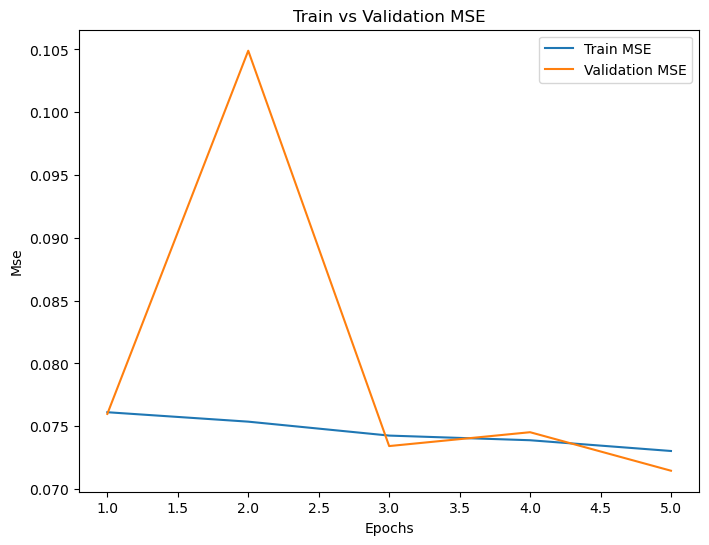

In [44]:
def plot_accuracy(model_history):
    train_acc = model_history.history['mse']
    val_acc = model_history.history['val_mse']
    epochs = range(1, len(train_acc) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_acc, label='Train MSE')
    plt.plot(epochs, val_acc, label='Validation MSE')
    plt.title('Train vs Validation MSE')
    plt.xlabel('Epochs')
    plt.ylabel('Mse')
    plt.legend()
    plt.show()

plot_accuracy(model_history)